In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

Overview of data

In [2]:
df = pd.read_csv('df.csv')
df.head(20)

,Unnamed: 0,user_name,date,comments_number,votes_number,title_of_post,type_of_post,snap_member,posted_photo,posted_video
0,0,u/AutoModerator,10 days ago,0 comments,10,Monthly Request Thread - February 2022,REQUEST,None,None,None
1,1,u/ApocTheLegend,2 months ago,2 comments,3,Lens Fest Updates Thread! Join Live 12/7 - 12/...,DISCUSSION,Snap Lens Network Member,None,None
2,2,u/Dependent-Mood9358,15 hours ago,2 comments,10,New feature disappeared?,None,None,None,None
3,3,u/tronixa88,1 day ago,0 comments,1,[help] reverse tween with same interaction tap ?,HELP,None,None,None
4,4,u/co-opino,3 days ago,0 comments,20,Please help me identify this lens 😳,REQUEST,None,Post image,None
5,5,u/quontemplation,5 days ago,2 comments,16,Can someone help me rediscover this lens?,REQUEST,None,Post image,None
6,6,u/Jorikrosa,4 days ago,0 comments,0,I don't need to o to the gym anymore,None,None,None,None
7,7,u/Brilliant-Benefit903,7 days ago,2 comments,4,Track AR Snap ML,None,None,None,None
8,8,u/theultimaterob,7 days ago,4 comments,8,Which Chex Mix piece are you filter. (Rye Chip...,None,None,None,auto
9,9,u/Sudi9,7 days ago,1 comment,1,"""Memory Hugs"" + link (collab with JpPirie)",NEW LENS,None,None,auto


In [3]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_name        618 non-null    object
 1   date             618 non-null    object
 2   comments_number  618 non-null    object
 3   votes_number     618 non-null    int64 
 4   title_of_post    618 non-null    object
 5   type_of_post     618 non-null    object
 6   snap_member      618 non-null    object
 7   posted_photo     618 non-null    object
 8   posted_video     618 non-null    object
dtypes: int64(1), object(8)
memory usage: 43.6+ KB


Defining and changing categories columns

In [5]:
cat_cols = ['type_of_post', 'snap_member']
df[cat_cols] = df[cat_cols].astype('category')
df[cat_cols].nunique()

type_of_post    9
snap_member     2
dtype: int64

In [6]:
df.head(5)

,user_name,date,comments_number,votes_number,title_of_post,type_of_post,snap_member,posted_photo,posted_video
0,u/AutoModerator,10 days ago,0 comments,10,Monthly Request Thread - February 2022,REQUEST,None,None,None
1,u/ApocTheLegend,2 months ago,2 comments,3,Lens Fest Updates Thread! Join Live 12/7 - 12/...,DISCUSSION,Snap Lens Network Member,None,None
2,u/Dependent-Mood9358,15 hours ago,2 comments,10,New feature disappeared?,None,None,None,None
3,u/tronixa88,1 day ago,0 comments,1,[help] reverse tween with same interaction tap ?,HELP,None,None,None
4,u/co-opino,3 days ago,0 comments,20,Please help me identify this lens 😳,REQUEST,None,Post image,None


Changing columns with data from object into datetime

In [7]:
import datetime
today = datetime.datetime.now()
numbers = []


for i in df['date']:
    if 'day' in i:
        for word in i.split():
            if word.isdigit():
                today = datetime.datetime.now() - timedelta(days = int(word))
                numbers.append(today)
    elif 'hour' in i:
        for word in i.split():
            if word.isdigit():
                today = datetime.datetime.now() - timedelta(hours = int(word))
                numbers.append(today)
    elif 'month' in i:
        for word in i.split():
            if word.isdigit():
                today = datetime.datetime.now() - timedelta(days = int(word)*31)
                numbers.append(today)


df.head(5)

,user_name,date,comments_number,votes_number,title_of_post,type_of_post,snap_member,posted_photo,posted_video
0,u/AutoModerator,10 days ago,0 comments,10,Monthly Request Thread - February 2022,REQUEST,None,None,None
1,u/ApocTheLegend,2 months ago,2 comments,3,Lens Fest Updates Thread! Join Live 12/7 - 12/...,DISCUSSION,Snap Lens Network Member,None,None
2,u/Dependent-Mood9358,15 hours ago,2 comments,10,New feature disappeared?,None,None,None,None
3,u/tronixa88,1 day ago,0 comments,1,[help] reverse tween with same interaction tap ?,HELP,None,None,None
4,u/co-opino,3 days ago,0 comments,20,Please help me identify this lens 😳,REQUEST,None,Post image,None


In [8]:
df['date'] = numbers
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.strftime('%B/%Y')
df.head(5)

,user_name,date,comments_number,votes_number,title_of_post,type_of_post,snap_member,posted_photo,posted_video
0,u/AutoModerator,March/2022,0 comments,10,Monthly Request Thread - February 2022,REQUEST,None,None,None
1,u/ApocTheLegend,January/2022,2 comments,3,Lens Fest Updates Thread! Join Live 12/7 - 12/...,DISCUSSION,Snap Lens Network Member,None,None
2,u/Dependent-Mood9358,March/2022,2 comments,10,New feature disappeared?,None,None,None,None
3,u/tronixa88,March/2022,0 comments,1,[help] reverse tween with same interaction tap ?,HELP,None,None,None
4,u/co-opino,March/2022,0 comments,20,Please help me identify this lens 😳,REQUEST,None,Post image,None


Extract numbers of comments from string and change format into int

In [9]:
comments_num = list()
for string in df['comments_number']:
    for word in string.split():
        if word.isdigit():
            comments_num.append(int(word))
df['comments_number'] = comments_num      

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   user_name        618 non-null    object  
 1   date             618 non-null    object  
 2   comments_number  618 non-null    int64   
 3   votes_number     618 non-null    int64   
 4   title_of_post    618 non-null    object  
 5   type_of_post     618 non-null    category
 6   snap_member      618 non-null    category
 7   posted_photo     618 non-null    object  
 8   posted_video     618 non-null    object  
dtypes: category(2), int64(2), object(5)
memory usage: 35.6+ KB


Overview of unique values of columns - type of post and count avarege quantity of each value

In [11]:
df['type_of_post'].unique()
df['type_of_post'].replace('None', 'OTHER', inplace = True)
df.groupby('type_of_post')['date'].count()

type_of_post
DISCUSSION           32
HELP                 52
LENS IN USE          29
NEW LENS            232
OTHER               230
REQUEST              34
REQUEST - SOLVED      2
Software              1
TUTORIAL              6
Name: date, dtype: int64

Overview of unique values of columns - snap member and count avarege quantity of each value

In [12]:
df['snap_member'].replace('None', 'Not member', inplace = True)
df.groupby('snap_member')['date'].count()

snap_member
Not member                  601
Snap Lens Network Member     17
Name: date, dtype: int64

In [13]:
df.loc[df['snap_member'] == 'Snap Lens Network Member', 'user_name'].unique()

array(['u/ApocTheLegend', 'u/thedrawing_board', 'u/Bennyp3333',
       'u/deejoyt', 'u/mypinkyhurts', 'u/Padajno', 'u/lukalangabriel',
       'u/Max_van_Leeuwen'], dtype=object)

Overview of unique values of columns - posted photo and count avarege quantity of each value

In [14]:
df['posted_photo'].replace('None', np.nan, inplace = True)
df['posted_video'].replace('None', np.nan, inplace = True)
df['posted_photo'] = df['posted_photo'].combine_first(df['posted_video'])
df.drop(['posted_video'], axis = 1, inplace = True)
df['posted_photo'].replace(
    ['Post image', np.nan, 'auto'], ['IMAGE', 'TEXT', 'VIDEO'], inplace = True
)
df.rename(columns = {'posted_photo':'type_of_content'}, inplace = True)
df['type_of_content'] = df['type_of_content'].astype('category')

In [15]:
df.groupby('type_of_content')['date'].count()

type_of_content
IMAGE     53
TEXT     368
VIDEO    197
Name: date, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   user_name        618 non-null    object  
 1   date             618 non-null    object  
 2   comments_number  618 non-null    int64   
 3   votes_number     618 non-null    int64   
 4   title_of_post    618 non-null    object  
 5   type_of_post     618 non-null    category
 6   snap_member      618 non-null    category
 7   type_of_content  618 non-null    category
dtypes: category(3), int64(2), object(3)
memory usage: 26.7+ KB


Defining popular users

In [17]:
df.groupby('user_name')['date'].count().sort_values(ascending = False).head(20)

user_name
u/itech2030               63
u/3dnano7_                48
u/Ayman878                40
u/Sudi9                   23
u/moonsugar999            14
u/Hamagardyy              13
u/see3li                  11
u/SpatialComputing        11
u/Jorikrosa               10
u/Irina_Mryan             10
u/AutoModerator           10
u/hnry_myr                 9
u/Embarrassed-South-23     9
u/ANSKF                    8
u/NihaalAli                6
u/PoorGlitch               6
u/Bennyp3333               6
u/Practical_Age_3169       6
u/dotankoren               5
u/xozi_yak                 5
Name: date, dtype: int64

Data Visualization

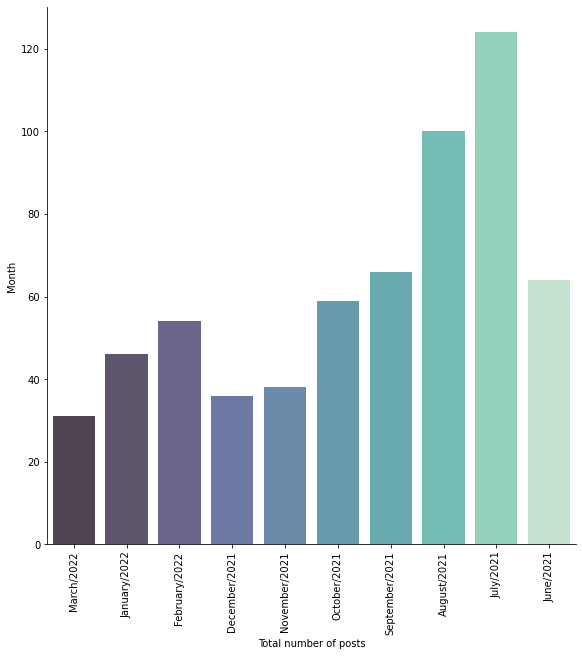

In [18]:
g = sns.catplot(
    data=df, kind="count", 
    x="date", palette="mako", 
    alpha=.8, height = 8
)
g.set_axis_labels("Total number of posts", "Month")
g.set_xticklabels(rotation=90)

In [19]:
df_plots = df.pivot_table(df, index = 'date', aggfunc = 'sum').reset_index()

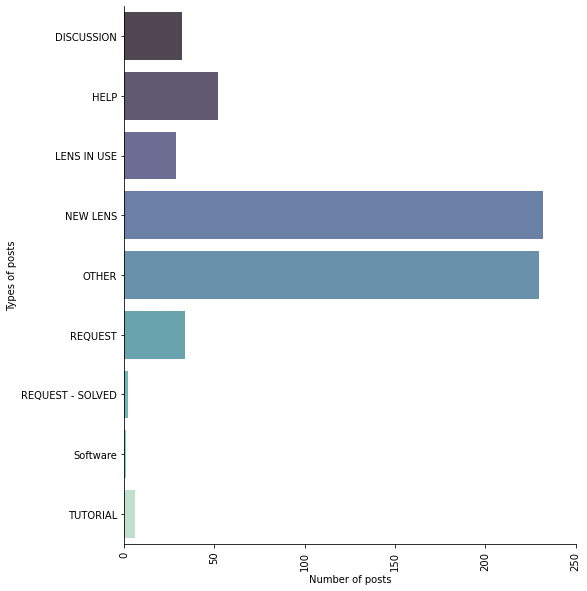

In [20]:
g = sns.catplot(
    data=df, kind="count", 
    y="type_of_post", palette="mako", 
    alpha=.8, height = 8
)
g.set_axis_labels("Number of posts", "Types of posts")
g.set_xticklabels(rotation=90)

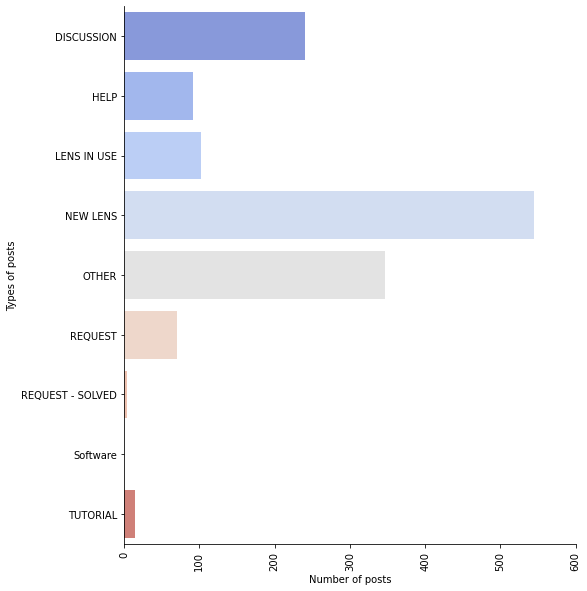

In [21]:
df_plots1 = df.pivot_table(df, index = 'type_of_post', aggfunc = 'sum').reset_index()
g = sns.catplot(
    data=df_plots1, kind="bar", 
    y="type_of_post", x = 'comments_number', palette="coolwarm", 
    alpha=.8, height = 8
)
g.set_axis_labels("Number of posts", "Types of posts")
g.set_xticklabels(rotation=90)

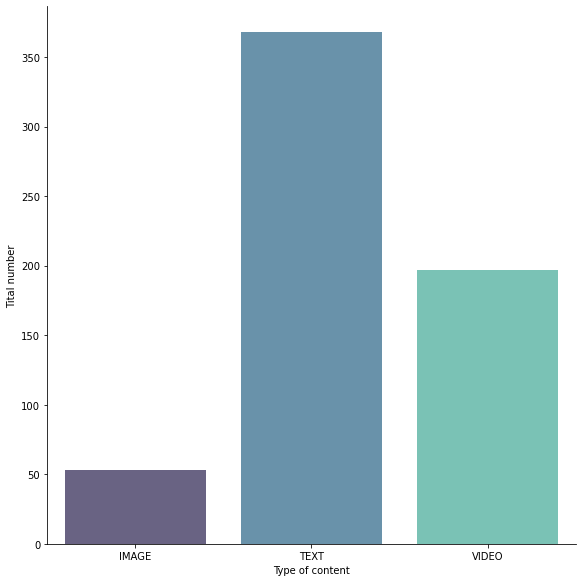

In [22]:
g = sns.catplot(
    data=df, kind="count", 
    x="type_of_content", palette="mako", 
    alpha=.8, height = 8
)
g.set_axis_labels("Type of content", "Tital number")

<AxesSubplot:xlabel='votes_number', ylabel='type_of_content'>

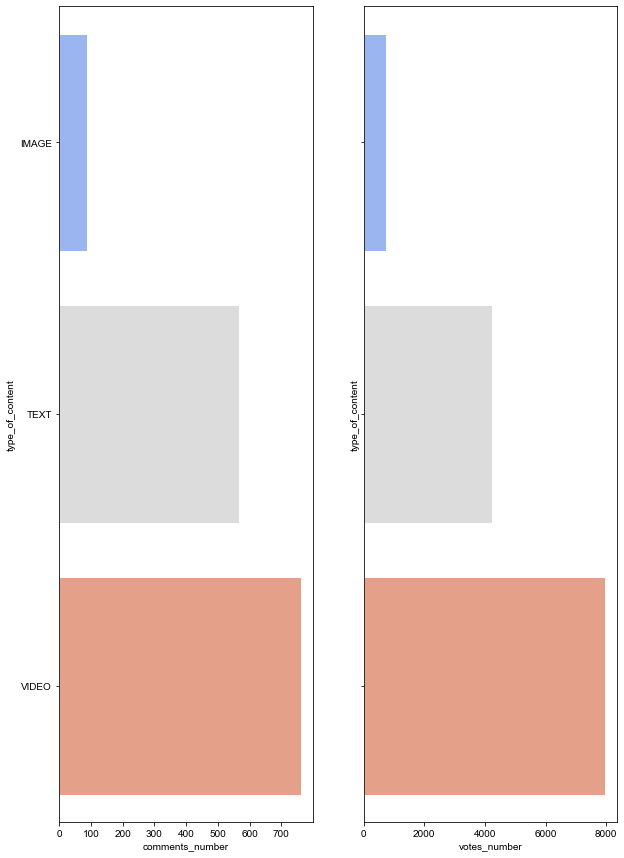

In [23]:
df_plots2 = df.pivot_table(df, index = ['type_of_content'], aggfunc = 'sum').reset_index()
fig, axes = plt.subplots(1, 2, figsize = (10, 15), sharey = True)
sns.set_style('darkgrid')

sns.barplot(data=df_plots2, x="comments_number", 
            y = 'type_of_content',
            palette="coolwarm", alpha=1, ax = axes[0])


sns.barplot(data=df_plots2, x="votes_number", 
            y = 'type_of_content',
            palette="coolwarm", alpha=1, ax = axes[1])